In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [40]:
def computeCost(X, y, theta):  # 代价函数
    inner = np.power((np.dot(X, theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [41]:
path = '../data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [42]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [44]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


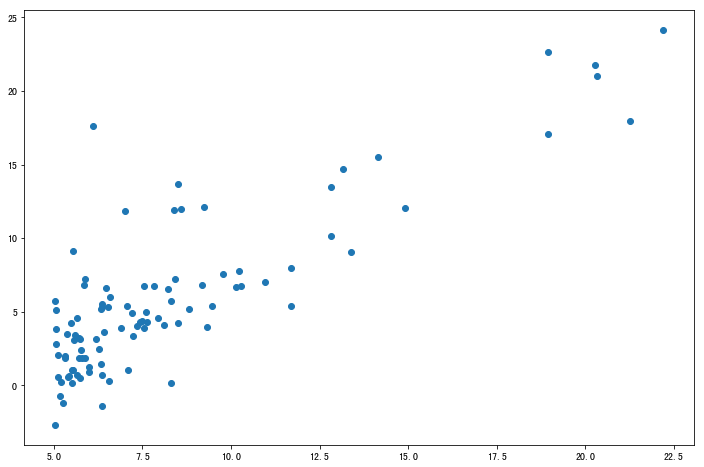

In [45]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(data.Population,data.Profit)
plt.show()

In [48]:
data.insert(0, 'ones', 1)

In [49]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [23]:
computeCost(X, y, theta)

32.072733877455676

In [24]:
def gradientDescent(X,y,theta,alpha,iters):
    tmp = np.matrix(np.zeros(theta.shape)) #初始化的1x2临时矩阵
    cost = np.zeros(iters) #初始不同的θ组合对应的J（θ）
    m = X.shape[0] #数据的组数即X矩阵的行数
    for i in range(iters): #迭代iters次
        tmp = theta - ( alpha / m )*( X * theta.T - y ).T * X
        #X（97，2），theta.T（2，1），y（97，1）
        theta = tmp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [25]:
alpha = 0.01
iters = 1000

final_theta,cost = gradientDescent(X,y,theta,alpha,iters)
print(final_theta,type(final_theta))
computeCost(X, y,final_theta)

[[-3.24140214  1.1272942 ]] <class 'numpy.matrix'>


4.515955503078912

In [50]:
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [51]:
final_theta = normalEqn(X,y)
print(final_theta,type(final_theta))
print(final_theta[0,0],final_theta[1,0])

[[-3.89578088]
 [ 1.19303364]] <class 'numpy.matrix'>
-3.89578087831188 1.1930336441895955


In [28]:
x = np.linspace(data.Population.min(),data.Population.max(),100)

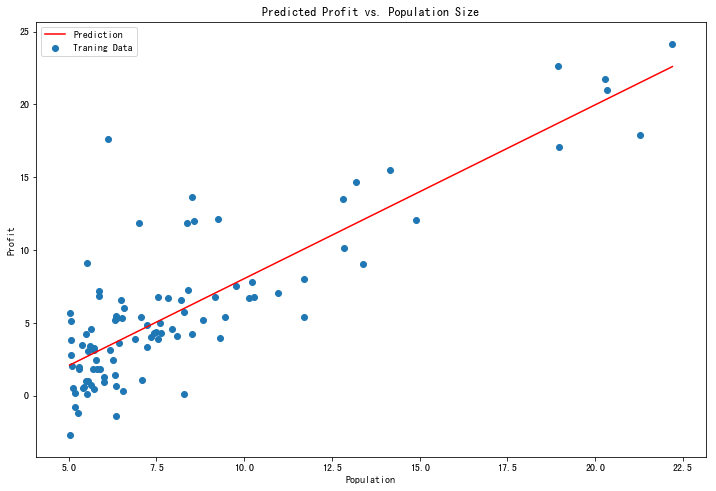

In [29]:
# f = final_theta[0, 0] + (final_theta[0, 1] * x)
f = final_theta[0,0] + (final_theta[1,0] * x)
fig, ax = plt.subplots(figsize=(12,8)) #调整画布的大小
ax.plot(x, f, 'r', label='Prediction') #画预测的直线 并标记左上角的标签
ax.scatter(data.Population, data.Profit, label='Traning Data') #画真实数据的散点图 并标记左上角的标签
ax.legend(loc=2) #显示标签
ax.set_xlabel('Population') #设置横轴标签
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size') #设置正上方标题
plt.show() #显示图像

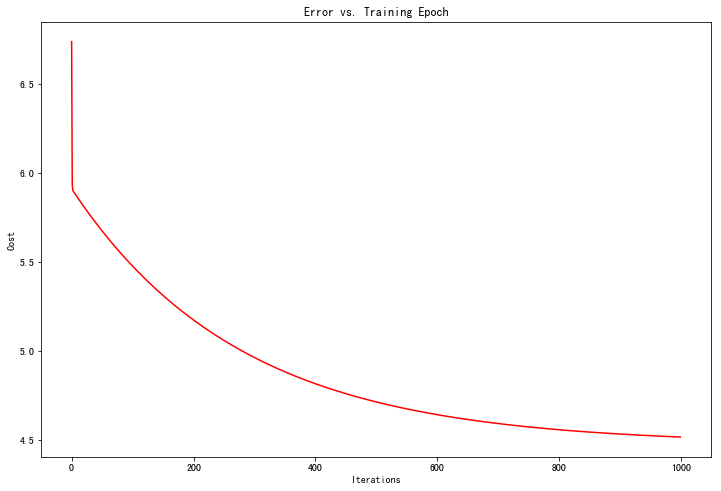

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,color='r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()


In [31]:
# 利用库的知识
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

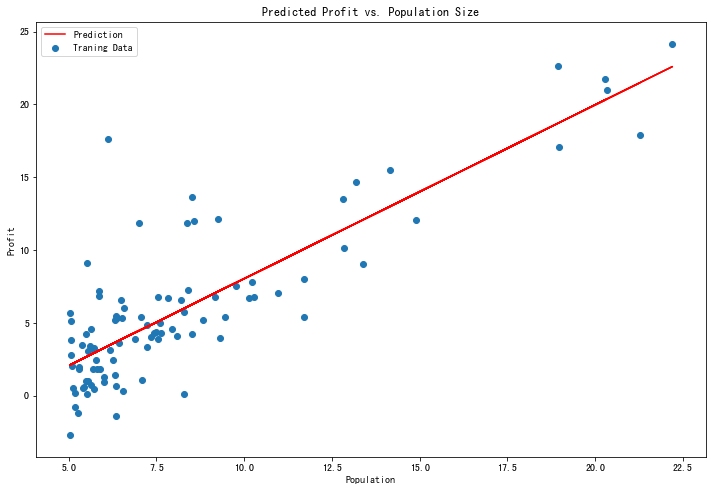

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


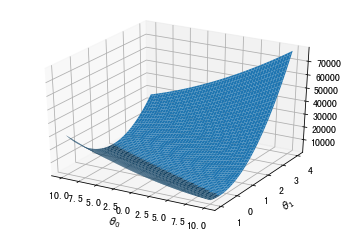

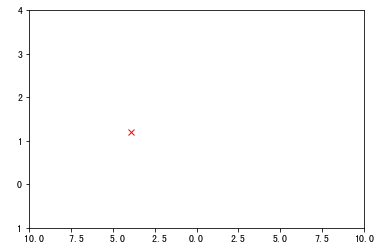

In [34]:
# ===================== Part 3: Visualizing J(theta0, theta1) =====================

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)
# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = computeCost(X, y, t)

J_vals = np.transpose(J_vals)
# 三维图
fig1 = plt.figure(1)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
# 等高线图
plt.figure(2)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(final_theta[0,0], final_theta[1,0], c='r', marker="x")
plt.show()

Plotting Data...


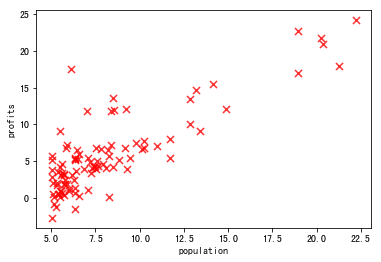

Running Gradient Descent...
Initial cost: 32.072733877455676(This value should be about 32.07
Theta found by gradient descent:[-3.63029144  1.16636235]


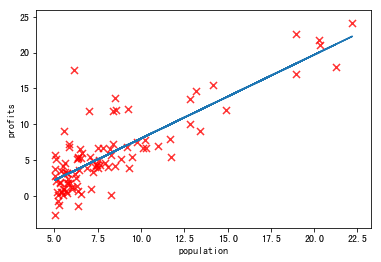

Program paused. Press ENTER to continue 


For population=35,000,we predict a profit of 4519.768(This value should be about 4519.77)
For population = 70,000, we predict a profit of 45342.450 (This value should be about 45342.45)


Program paused. Press ENTER to continue 


Visualizing J(theta_0,theta_1)...
100
100


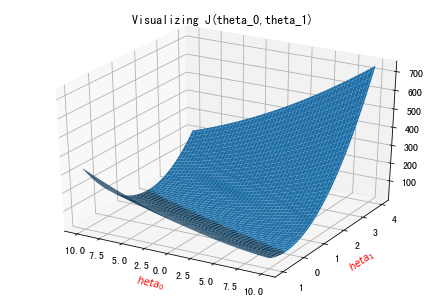

/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'normal'
  s)


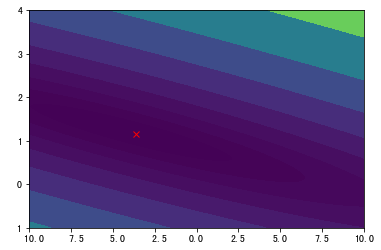

In [36]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
def plot_data(x,y):
    plt.scatter(x,y,marker='x',s=50,c='r',alpha=0.8)
    plt.xlabel('population')
    plt.ylabel('profits')
    plt.show()


def h(X,theta):
    return X.dot(theta)
def compute_cost(X,y,theta):
    m=y.size
    prediction=h(X,theta)
    # cost=sum(np.power(prediction-y,2))/(2*m)
    cost = (prediction - y).dot(prediction - y) / (2 * m)
    return cost
def gradient_descent(X,y,theta,alpha,num_iters):
    m=y.size
    J_history=np.zeros(num_iters)
    for i in range(0,num_iters):
        # theta=theta-(alpha/m)*sum((h(X,theta)-y).dot(X))
        theta=theta-(alpha/m)*(h(X,theta)-y).dot(X)
        J_history[i]=compute_cost(X,y,theta)

    return theta,J_history
    
print('Plotting Data...')
data=np.loadtxt('../data/ex1data1.txt',delimiter=',')#加载txt格式数据集 每一行以“，”分隔

X=data[:,0]
y=data[:,1]

m=y.size

plt.figure(0)
plot_data(X,y)
# input()

print('Running Gradient Descent...')
X=np.c_[np.ones(m),X]
theta=np.zeros(2)

iterations=1500
alpha=0.01
print('Initial cost: '+str(compute_cost(X,y,theta))+'(This value should be about 32.07')
theta,J_history =gradient_descent(X,y,theta,alpha,iterations)
print('Theta found by gradient descent:'+str(theta.reshape(2)))

plt.figure(0)
line1, =plt.plot(X[:,1],np.dot(X,theta),label='Linear Regression')
plot_data(X[:,1],y)
plt.legend(handles=[line1])

input('Program paused. Press ENTER to continue')

predict1=np.dot(np.array([1,3.5]),theta)
print('For population=35,000,we predict a profit of {:0.3f}(This value should be about 4519.77)'.format(predict1*10000))
predict2=np.dot(np.array([1,7]),theta)
print('For population = 70,000, we predict a profit of {:0.3f} (This value should be about 45342.45)'.format(predict2*10000))
input('Program paused. Press ENTER to continue')

print('Visualizing J(theta_0,theta_1)...')
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]))
print(theta0_vals.shape[0])
print(theta1_vals.shape[0])


for i in range(0,theta0_vals.shape[0]):
    for j in range(0,theta1_vals.shape[0]):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i][j]=compute_cost(X,y,t)
J_vals=np.transpose(J_vals)
fig=plt.figure(1)
ax=Axes3D(fig)
xs,ys=np.meshgrid(theta0_vals,theta1_vals)
plt.title("Visualizing J(theta_0,theta_1)")

ax.plot_surface(xs,ys,J_vals)
ax.set_xlabel('$\theta_0$',color='r')
ax.set_ylabel('$\theta_1$',color='r')

plt.show()

plt.figure(2)
lvls=np.logspace(-2,3,20)
plt.contourf(xs,ys,J_vals,10,levels=lvls,normal=LogNorm())

plt.plot(theta[0], theta[1], c='r', marker="x")

plt.show()

Ploting Data...



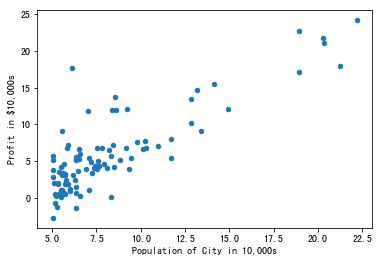

Running Gradient Descent...



/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/jovyan/.virtualenvs/basenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/jovyan/.virtualenvs/basenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


Theta found by gradient descent:
 [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan]] 



ValueError: x and y must have same first dimension, but have shapes (97, 1) and (1, 97)

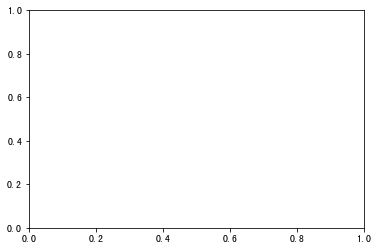

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

def computeCost(X, y, theta):
	#计算成本函数J的值``
    m = len(y)
    J = np.sum(np.power((X*theta - y), 2)) / (2 * m)
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
	#梯度下降法，得到最终的theta值，并将每次迭代后的J值保留在J_history中。
    m = len(y)
    J_history = np.mat(np.zeros((num_iters, 1)))
    for i in range(num_iters):
       theta = theta - alpha * X.T * (X * theta - y) / m
       J_history[i] = computeCost(X, y, theta)   
    return [theta, J_history]

## Part 1: Ploting Data
print('Ploting Data...\n')
filename = '../data/ex1data1.txt'

data = pd.read_csv(filename, header = None, names = ['x1', 'y'])
data.plot.scatter('x1', 'y')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Part 2: Cost and Gradient descent
data.insert(0, 'x0', 1) #向数据添加为1的整数列
X = data.iloc[:, :-1] #得到变量X 
y = data.iloc[:, -1] #得到变量y 

X = np.mat(X)
y = np.mat(y) #将X, y变为矩阵形式

#设置一些初始参数
theta = np.mat(np.zeros((2, 1)))
iterations = 1500
alpha = 0.01

print('Running Gradient Descent...\n')
[theta, J_history] = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta,'\n')


# plot the linear fit
plt.plot(X[:,1], y, 'bo', markersize = 4)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X * theta, 'r-')
plt.legend(('Training data', 'Linear regression'))
plt.show()


## Part 3: Visualizing J(theta_0, theta_1)
print('Visualizing J(theta_0, theta_1)...\n')

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.vstack((theta0_vals[i], theta1_vals[j]))
        J_vals[i,j] = computeCost(X, y, t)


fig = plt.figure()
ax1 = Axes3D(fig)
ax1.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = 'rainbow')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()


plt.contour(theta0_vals, theta1_vals, J_vals.T, levels = np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx', markersize = 10, linewidth = 2)
plt.show()
